In [109]:
import sys
print(sys.version , "\n", sys.executable)
!pwd
# sys.path
#sorted([module for module in sys.modules.keys()])
#!conda list # modules

3.5.1 |Anaconda 2.5.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)] 
 /Users/Phoenix/anaconda/bin/python
/Users/Phoenix/Dropbox/Projects/Code/Algorithms4DNASeq/week1


# String Manipulation in Python

In [86]:
string = "AACCGT"

In [87]:
len(string)

6

In [88]:
string[2:4]

'CC'

In [89]:
string[1::2]

'ACT'

In [90]:
string[::-1]

'TGCCAA'

### Concatenating Strings

In [91]:
string1 = "ACCT"
string2 = "GGG"
string1 + string2

'ACCTGGG'

In [92]:
",".join(string1)

'A,C,C,T'

In [93]:
seqs = ["acgt" , "Gcc", "AATc"]

"I have alot bunch of cute sequences {} :)".format(",".join(seqs).upper())

'I have alot bunch of cute sequences ACGT,GCC,AATC :)'

### Generating Random Strings

#### By using for loop:

In [94]:
import random
random.seed(7) 
seq = ''
for _ in range(10):
    seq += random.choice("ACGT")
print(seq)




GCTAAAGACA


#### By using list comprehension

In [95]:
import random 
random.seed(7) # same behavior everytime

seq = ''.join([random.choice('ACGT') for _ in range(10)])
seq



'GCTAAAGACA'

## Manipulating DNA strings

In [96]:
def longestCommonPrefix(s1, s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i+=1
    return s1[:i]


In [97]:
longestCommonPrefix("AACCGGGG", "AACCGTTGCA")

'AACCG'

In [98]:
def isMatch(s1, s2):        ## same like "AAA" == "AA"
    if len(s1) == len(s2):
        for i in range(len(s1)):
            if s1[i] == s2[i]:
                return True
    return False

In [99]:
isMatch("AA","AAAA")


False

In [100]:
def reverseComplement(s):
    complement_list = {"A":"T", "C":"G", "G":"C", "T":"A"}
    output = ""

    for base in s:
        output = complement_list[base] + output
    return output

In [101]:
print(reverseComplement("ACGT"))

ACGT


---
### Parsing Fasta Files

** Fasta format: ** is a text-based format for storing biological sequences

In [2]:
def readGenome(file):
    """
    takes a fasta file and returns a string contains only the bases
    """
    genome = ""
    with open(file, "r") as f:
        for line in f:
            if not line[0] =='>':
                genome += line.rstrip()  # to execlude \n \t \r 
    return genome

def percentages(genome):
    """
    calculating the genome bases percentages
    """
    counts = {"A":0, "C":0, "G":0, "T":0}
    for base in genome:
        counts[base] += 1 
    return counts

In [119]:
!nohup wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

appending output to nohup.out


In [3]:
genome = readGenome("lambda_virus.fa")
percentages(genome)


{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}

In [4]:
import collections              # another way to do the same job
collections.Counter(genome)

Counter({'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986})

### Parsing FastQ File

** FasTQ format: ** is a text-based format for storing both a biological sequence and its corresponding phred33 quality scores.

** Base Quality:** is the base caller estimation of the probability of that base was called incorrectly 

$$Q =  -10 * log_{10}(p) $$
Q is the base quality

p is the probability that a base was called incorrectly 

Phred33 is the ASCII represenation of the base quality after rounding it to the nearst integer and adding 33 

In [88]:
!nohup wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

appending output to nohup.out


In [29]:
def fastqParser(file):
    """
    takes a fastq file and returns two list objects; reads and qualities
    """
    with open(file, "r") as f:
            lines = [line.rstrip() for line in f.readlines()]
    
    reads = [line for line in lines[1::4]]
    qualities = [line for line in lines[3::4]]
    
    return reads, qualities

def Q2phred33(Q):
    """
    take base quality and returns its phred33 value
    round to the nearst integer then 
    """
    return chr(round(Q) + 33)

def phred33toQ(qual):
    """
    take phred33 quality score and return an approximation of the base quality score
    """
    return ord(qual) - 33

def base_quality_histo(qualities_lst):
    """
    takes phred33 qualities and return base quality histogram 
    """
    hist = [0] * 50
    for qualities in qualities_lst:
        for qual in qualities:
            q = phred33toQ(qual)
            hist[q] += 1
    return hist

def GCfinder(reads):
    gc = [0] * 100
    total = [0] * 100

In [89]:
reads_lst, qualities_lst = fastqParser('SRR835775_1.first1000.fastq')  ## what if Q33 equals ' or " !!!

for qualities in qualities_lst:
    for qual in qualities:
        if qual == '"' or i == "'":
            print(qual)

In [108]:
print(base_quality_histo(qualities_lst))

[6, 2, 4, 20, 14, 14, 215, 119, 35, 169, 506, 553, 302, 70, 41, 39, 126, 363, 255, 704, 224, 644, 474, 519, 760, 270, 315, 371, 515, 937, 1078, 2615, 1542, 2879, 3189, 5178, 9172, 16755, 29108, 14329, 4099, 1114, 286, 70, 0, 0, 0, 0, 0, 0]


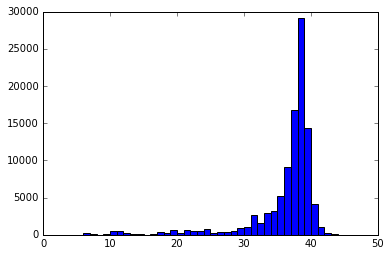

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt


Q33scores = base_quality_histo(qualities_lst) 
xticks_pos = [i for i in range(51)]
plt.bar(range(len(Q33scores)) , Q33scores , width=1 )
plt.show()

In [142]:
import collections

count = collections.Counter()
for read in reads_lst:
    count.update(read)
print(count)

Counter({'T': 30531, 'A': 28426, 'C': 21890, 'G': 19147, 'N': 6})


----
**GC content: **different species may have different GC content. we can use GC content to figure out whether the mix of bases is changing over the read or not ? auner normal consequences it should not change but if there is for example bad sequencing cycle, we may see different gc content than the other bases


In [143]:
def GCfinderByPosition(reads):
    """
    calaulating gc content at each base
    """
    gc = [0] * len(reads[0])
    totals = [0] * 100
    
    for read in reads:
        for index, base in enumerate(read):
            if base == 'C' or  base=='G':
                gc[index] += 1
            totals[index] += 1
    for i in range(len(gc)):
        gc[i] /= float(totals[i])
                
    return gc

In [144]:
def GCcalaculator(reads):
    """
    calaulating gc content at each base
    """
    gc = [0] * 100
    totals = [0] * 100
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i]=='G':
                gc[i] += 1
            totals[i] += 1
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
                
    return gc

100


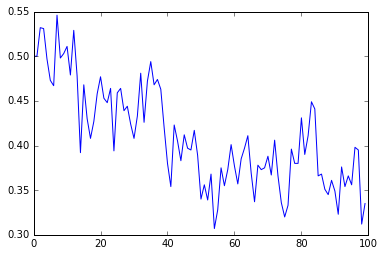

In [145]:
print(len(reads_lst[0]))
gc = GCcalaculator(reads_lst)
gc= GCfinderByPosition(reads_lst)
plt.plot(range(len(gc)), gc)
plt.show()

---
### Read-Alignment Problem
in simple words how to find a read in a reference genome 

In [156]:
# simplified version of read-alignment problem:

p = "word"
t = "There would habe been a time for such a word"

# at what offsets does the pattern p occur within text t
t.find(p)


40

#### Naive Exact matching algorithm

let x = |P|, y=|T|

How many alignments are possible given x and y? 
$$ y - x + 1 $$

What is the greatest number of character comparisons possible? 
$$ x (y - x + 1) $$
* p = "aaa"
* t = "aaaaaaaaaaaaaaaaaaa"

what is the least number of character comparisons possible? 
$$y - x + 1 $$
* p = "baa"
* t = "aaaaaaaaaaaaaaaaaaa"

In [73]:
def naive(p, t):
    """
    Implementaion of the Naive Exact Matching Algorithm
    :param p: pattern
    :param t: text
    :return: a list object contains the indices of the matched strings
    """
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over all 'possible' alignments
        match = True
        for j in range(len(p)):           # loop over characters
            if t[i+j] != p[j]:            # compare characters
                match = False             # mismatch; reject alignment
                break
        if match:
            occurrences.append(i)         # all chars matched; recorded
    return occurrences


In [74]:
t = "ACCGTGTACGTAC"
p = "AC"
naive(p, t)

[0, 7, 11]

In [75]:
def readGenerator(genome, number_of_reads, reads_length):
    """
    Generate reads from random position in a given genome

    :param genome: string objects contain a sequence
    :param number_of_reads: number of the reads to be generated
    :param reads_length: the length of the reads
    :return: list object contains reads
    """

    import random

    reads = []
    if len(genome) >= reads_length:
        for i in range(number_of_reads):
            # first we should choose a valid position for the read
            position = random.randint(0, len(genome) - reads_length + 1)
            read = genome[position:position+reads_length]

            reads.append(read)
    return reads
    

### Implementing the naive with real reads and genome

In [76]:
!nohup wget "https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa"

reads, _ = fastqParser("ERR266411_1.first1000.fastq")  # _ indicates that Im not interested in it
genome = genome = readGenome("phix.fa")

appending output to nohup.out


In [77]:
# for each read, loop over the genome and find if its matched or not 
number_matches = 0
number_of_reads = 0

for read in reads:
    number_of_reads += 1
    match = naive(read, genome)        # check matching
    
    if match:
        number_matches += 1

print("%d / %d reads matched the genome" % (number_matches, number_of_reads))

7 / 1000 reads matched the genome


In [78]:
# eaxtly the same previous experiment, but we decrese the length of the read to check whether 
number_matches = 0
number_of_reads = 0

for read in reads:
    read = read[:30]
    number_of_reads += 1
    match = naive(read, genome)        # check matching
    
    if match:
        number_matches += 1

print("%d / %d reads matched the genome" % (number_matches, number_of_reads))

459 / 1000 reads matched the genome


_ ** notice that the number of matches still low, and the reason behind that is not only sequencing errors but also the fact that reads may come from the reversed strand !! ** _

In [79]:
# eaxtly the same previous experiment, but we added the reveres complement for each read
def reverseComplement(s):
    complement_list = {"A":"T", "C":"G", "G":"C", "T":"A", "N":"N"}
    output = ""

    for base in s:
        output = complement_list[base] + output
    return output


number_matches = 0
number_of_reads = 0

for read in reads:
    read = read[:30]
    number_of_reads += 1
    match = naive(read, genome)        # check matching
    match.extend(naive(reverseComplement(read), genome))   # appending elements of list not the list
    if match:
        number_matches += 1

print("%d / %d reads matched the genome" % (number_matches, number_of_reads))


932 / 1000 reads matched the genome


---
## Programming Homework 

1- How many times does 𝙰𝙶𝙶𝚃 or its reverse complement (𝙰𝙲𝙲𝚃) occur in the lambda virus genome? E.g. if 𝙰𝙶𝙶𝚃 occurs 10 times and 𝙰𝙲𝙲𝚃 occurs 12 times, you should report 22.

In [107]:
genome = readGenome("lambda_virus.fa")
pattern = "ACCT"
match = naive(pattern, genome)
match.extend(naive(reverseComplement(pattern), genome))
print(len(match))

306


2- How many times does 𝚃𝚃𝙰𝙰 or its reverse complement occur in the lambda virus genome?

In [108]:
genome = readGenome("lambda_virus.fa")
pattern = "TTAA"
match = naive(pattern, genome)
# match.extend(naive(reverseComplement(pattern), genome)) cos TTAA = reverseComplement(TTAA)
print(len(match))

195


3- What is the offset of the leftmost occurrence of 𝙰𝙲𝚃𝙰𝙰𝙶𝚃 or its reverse complement in the Lambda virus genome? E.g. if the leftmost occurrence of 𝙰𝙲𝚃𝙰𝙰𝙶𝚃 is at offset 40 (0-based) and the leftmost occurrence of its reverse complement 𝙰𝙲𝚃𝚃𝙰𝙶𝚃 is at offset 29, then report 29.

In [115]:
genome = readGenome("lambda_virus.fa")
pattern = "ACTAAGT"
match_forward = naive(pattern, genome)
match_reverse = naive(reverseComplement(pattern), genome)

match_forward, match_reverse

rsult = 26028

In [114]:
genome = readGenome("lambda_virus.fa")
pattern = "AGTCGA"
match_forward = naive(pattern, genome)
match_reverse = naive(reverseComplement(pattern), genome)

match_forward, match_reverse

([18005, 23320, 33657, 44806], [450, 1908, 2472, 41927, 45369])

5- As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the 𝚗𝚊𝚒𝚟𝚎 function called 𝚗𝚊𝚒𝚟𝚎_𝟸𝚖𝚖 that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. We're looking for approximate matches for P itself, not its reverse complement.

￼

For example, 𝙰𝙲𝚃𝚃𝚃𝙰 occurs twice in 𝙰𝙲𝚃𝚃𝙰𝙲𝚃𝚃𝙶𝙰𝚃𝙰𝙰𝙰𝙶𝚃, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So 𝚗𝚊𝚒𝚟𝚎_𝟸𝚖𝚖('𝙰𝙲𝚃𝚃𝚃𝙰', '𝙰𝙲𝚃𝚃𝙰𝙲𝚃𝚃𝙶𝙰𝚃𝙰𝙰𝙰𝙶𝚃') should return the list [𝟶, 𝟺].

Hint: See this notebook for a few examples you can use to test your 𝚗𝚊𝚒𝚟𝚎_𝟸𝚖𝚖 function.

How many times does 𝚃𝚃𝙲𝙰𝙰𝙶𝙲𝙲 occur in the Lambda virus genome when allowing up to 2 mismatches?


In [116]:
def naiveWitherrors(p, t, errors):
    """
    Implementaion of the Naive Exact Matching Algorithm
    :param p: pattern
    :param t: text
    :param errors: number or accepted errors in each match
    :return: a list object contains the indices of the matched strings
    """
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over all 'possible' alignments
        error = 0
        match = True
        for j in range(len(p)):           # loop over characters
            if t[i+j] != p[j]:            # compare characters
                errors += 1
                if error > errors:

                    match = False             # mismatch; reject alignment
                    break
        if match:
            occurrences.append(i)         # all chars matched; recorded
    return occurrences

In [118]:
genome = readGenome("lambda_virus.fa")
pattern = "TTCAAGCC"

match = naive2errors(pattern, genome, 2)

print(len(match))

191


6- What is the offset of the leftmost occurrence of 𝙰𝙶𝙶𝙰𝙶𝙶𝚃𝚃 in the Lambda virus genome when allowing up to 2 mismatches?

In [120]:
genome = readGenome("lambda_virus.fa")
pattern = "AGGAGGTT"

match = naive2errors(pattern, genome, 2)

match

[49,
 282,
 299,
 302,
 380,
 1560,
 1650,
 2235,
 2277,
 2400,
 2562,
 2565,
 2729,
 2823,
 3160,
 3181,
 3946,
 4210,
 4294,
 4309,
 4405,
 4580,
 5069,
 5159,
 5189,
 5231,
 5331,
 5519,
 5737,
 5882,
 5993,
 5996,
 6011,
 6312,
 6522,
 6585,
 6606,
 7316,
 7394,
 7819,
 7904,
 7966,
 7998,
 8534,
 8648,
 8946,
 9339,
 9354,
 9530,
 9842,
 9966,
 10041,
 10250,
 10416,
 10445,
 10484,
 10527,
 10874,
 11193,
 11292,
 11505,
 11568,
 11655,
 11745,
 11838,
 12078,
 12180,
 12222,
 12697,
 12745,
 12819,
 12880,
 12935,
 13011,
 13087,
 13256,
 13415,
 13526,
 13813,
 14259,
 15385,
 15473,
 16192,
 17101,
 17437,
 17755,
 17936,
 17989,
 18016,
 18040,
 18727,
 18853,
 18911,
 19232,
 19263,
 19310,
 19833,
 19929,
 19932,
 19947,
 19980,
 20793,
 20802,
 21305,
 21528,
 21627,
 21684,
 22414,
 22660,
 22670,
 22787,
 23326,
 24063,
 24145,
 24409,
 24595,
 24681,
 25120,
 25139,
 25210,
 25381,
 25384,
 25648,
 25664,
 25773,
 25987,
 26196,
 26208,
 26576,
 26587,
 26653,
 26736,
 

Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question. The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [150]:
!nohup wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

appending output to nohup.out
